In [19]:
! pip install scikit-image

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [20]:
# import your code
from encoder import encode, header_bits
from decoder import decode
import numpy as np
import matplotlib.pyplot as plt

from cued_sf2_lab.familiarisation import load_mat_img, plot_image

from simple_lbt_functions import *

from cued_sf2_lab.laplacian_pyramid import quantise
from cued_sf2_lab.laplacian_pyramid import bpp
from cued_sf2_lab.laplacian_pyramid import *


from scipy.optimize import minimize

from cued_sf2_lab.jpeg import (
    jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen)

In [21]:
# Test encoder/decoder here
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

k = 1
step = 17
Y = lbt(X, N=8, s=1.31)
print(np.min(Y), np.max(Y))


print(Y[::32,::32].astype(int))


step = 20
Yq1 = quant1(Y, step, step)
print(Yq1[::32,::32].astype(int))

Yq2 = quant2(Yq1, step, step)
print(Yq2[::32,::32].astype(int))


-972.8265057421221 944.8780953355696
[[ -73  -40  -73  -87  -30 -123    1  164]
 [-250 -247  -71  -64   36 -620  244  199]
 [  50   54 -201  -47 -207  640  240  243]
 [ 107 -108  -31  100 -184 -244  133  146]
 [ 288 -377 -190 -154 -311  593   52   93]
 [ 695  420  586  -63  800  662 -382 -564]
 [-209  300  320  464  435  337  317  148]
 [ 252  481  -85  196  194 -129 -131 -517]]
[[ -3  -2  -3  -4  -1  -6   0   8]
 [-12 -12  -3  -3   1 -31  12   9]
 [  2   2 -10  -2 -10  32  12  12]
 [  5  -5  -1   5  -9 -12   6   7]
 [ 14 -18  -9  -7 -15  29   2   4]
 [ 34  21  29  -3  40  33 -19 -28]
 [-10  15  16  23  21  16  15   7]
 [ 12  24  -4   9   9  -6  -6 -25]]
[[ -70  -50  -70  -90  -30 -130    0  170]
 [-250 -250  -70  -70   30 -630  250  190]
 [  50   50 -210  -50 -210  650  250  250]
 [ 110 -110  -30  110 -190 -250  130  150]
 [ 290 -370 -190 -150 -310  590   50   90]
 [ 690  430  590  -70  810  670 -390 -570]
 [-210  310  330  470  430  330  310  150]
 [ 250  490  -90  190  190 -130 -130

-977.5 943.5


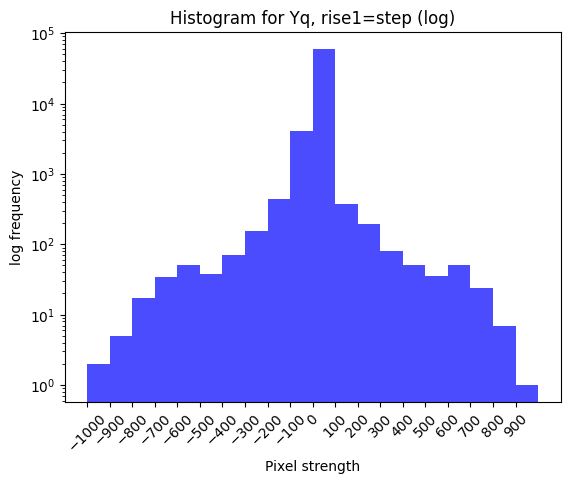

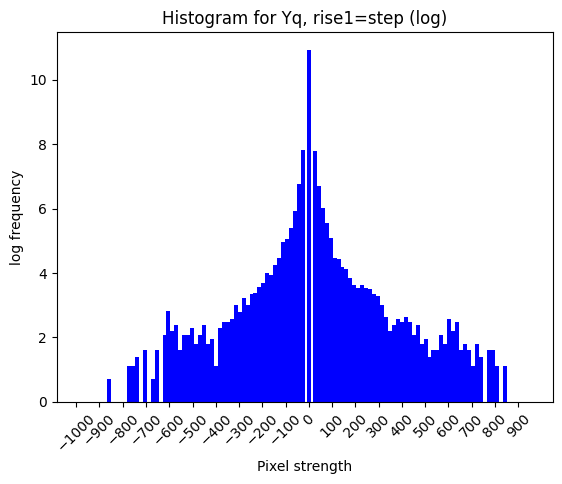

In [22]:
X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0

k = 1
step = 17
Y = lbt(X, N=8, s=1.31)
Yq = quantise(Y, step, step*k)
print(np.min(Yq), np.max(Yq))
#print(Y[::32,::32].astype(int))
#print(Yq[::32,::32].astype(int))

# Flatten the array to create a 1D array
flattened_data = Yq.flatten()
plt.hist(flattened_data, bins=20, range=[-1000, 1000], color='blue', alpha=0.7, log=True)
plt.xticks(np.arange(-1000,1000,100))
plt.xticks(rotation=45)
plt.xlabel('Pixel strength')
plt.ylabel('log frequency')
plt.title('Histogram for Yq, rise1=step (log)')
plt.show()

# Calculate the frequencies of each unique number
unique_numbers, counts = np.unique(flattened_data, return_counts=True)
plt.bar(unique_numbers, np.log(np.array(counts)), width=step, color='blue') 
plt.xticks(np.arange(-1000,1000,100))
plt.xticks(rotation=45)
plt.xlabel('Pixel strength')
plt.ylabel('log frequency')
plt.title('Histogram for Yq, rise1=step (log)')
plt.show()

In [23]:
a = np.array([0,2,5])
b = np.array([1,3,5,7,9,5,0,10,2])


c = np.digitize(b, a) - 1
print(c)

[0 1 2 2 2 2 0 2 1]


-972.8265057421221 944.8780953355696
[[-483 -415 -286  272 -209  305 -109  -45]
 [-406  289  189  -85 -422  400   82 -117]
 [ 208  151 -126 -195 -150 -387 -123  -87]
 [-244  297 -273 -193 -233  468  102  -27]
 [ 438 -477 -400  232  288 -401 -134  -97]
 [ 413  482  425  -88 -138  234 -394 -320]
 [ 497 -445 -457 -274  425 -203  172  166]
 [-278 -476  480  300  134 -336  142  -88]]
-500 499
[-777 -514 -386 -297 -247 -210 -183 -162 -143 -129 -118 -109 -101  -94
  -87  -81  -76  -71  -67  -63  -60  -57  -54  -52  -50  -48  -47  -45
  -44  -42  -41  -40  -39  -37  -36  -35  -34  -33  -33  -32  -31  -30
  -30  -29  -28  -28  -27  -27  -26  -25  -25  -24  -24  -24  -23  -23
  -22  -22  -22  -21  -21  -20  -20  -20  -20  -19  -19  -19  -18  -18
  -18  -17  -17  -17  -17  -16  -16  -16  -16  -16  -15  -15  -15  -15
  -15  -14  -14  -14  -14  -14  -13  -13  -13  -13  -13  -13  -12  -12
  -12  -12  -12  -12  -12  -11  -11  -11  -11  -11  -11  -11  -10  -10
  -10  -10  -10  -10  -10  -10  -10   -9 

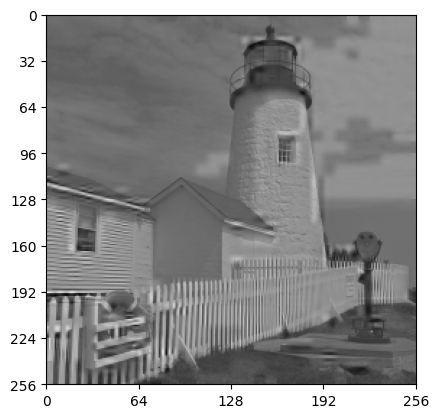

In [37]:
import numpy as np

n_bins = 1000

def quantize_array(Y, n_bins=100):
    Y_flattened = Y.flatten()
    Y_sorted = np.sort(Y_flattened)
    
    num_values = len(Y_sorted)
    values_per_bin = num_values // n_bins
    real_n_bins = n_bins #+ (num_values%n_bins != 0)
    
    bin_boundaries = [Y_sorted[i*values_per_bin] for i in range(real_n_bins)]
    bin_boundaries.append(Y_sorted[-1])
    
    Yq_mean = np.array([(bin_boundaries[i]+bin_boundaries[i+1])/2 for i in range(len(bin_boundaries)-1)])
    
    Yq = np.digitize(Y, bin_boundaries[:-1]) - 1 - n_bins//2
    #print(Yq_mean.shape)

    # For Decoding
    #for i in range(Yq.shape[0]):
    #    for j in range(Yq.shape[1]):
    #        #print(Yq[i,j])
    #        Yq[i,j] = Yq_mean[Yq[i,j]]
    
    
    return Yq, Yq_mean, bin_boundaries

# Example usage
#Y = np.random.uniform(low=-1000, high=1000, size=(256, 256))

X, _ = load_mat_img('lighthouse.mat', img_info='X')
X = X - 128.0
k = 1
step = 17
Y = lbt(X, N=8, s=1.31)
print(np.min(Y), np.max(Y))

# quant5
Yq, Yq_mean, bin_boundaries = quantize_array(Y, n_bins)

# Print the mean values of each bin
#for i, mean_value in enumerate(Yq_mean):
#    print(f"Bin {i}: {mean_value}")

print(Yq[::32+1,::32+1])
print(Yq.min(),Yq.max())      


print(Yq_mean.astype(int))
print(np.array(bin_boundaries[::5]).astype(int))

print(len(bin_boundaries))
print(np.max(Yq), np.min(Yq))




# quant6
Zq = Yq.copy() + n_bins//2
Zi = Zq.copy()
for i in range(Yq.shape[0]):
    for j in range(Yq.shape[1]):
        #print(Yq[i,j])
        Zi[i,j] = Yq_mean[Zq[i,j]]

print(Zi[::64,::64].astype(int))
print(np.min(Zi),np.max(Zi))
print(Y[::64,::64].astype(int))

print(Zi.max(), Zi.min())

# ilbt and normalize
N = 8
s = 1.31


Z = ilbt(Zi, N, s)

Zq = Z
z_max = np.max(Zq)
z_min = np.min(Zq)
Zq = Zq * 256/np.abs(z_max - z_min)
Zq = Zq - np.min(Zq)
Z = Zq



fig,ax = plt.subplots()
plot_image(Z)

print(f"RMS  = {np.std(Z-X)}")
print(f"Bits needed = {bpp(Yq)*Yq.size}")
# Calculate SSIM
ssim_index = ssim(X+128.0, Z, data_range=Z.max() - Z.min())
# Calculate PSNR
psnr_value = psnr(X+128.0, Z, data_range=Z.max() - Z.min())
print("SSIM:", ssim_index)
print("PSNR:", psnr_value)

print(np.min(X), np.max(X))
print(np.min(Z), np.max(Z))


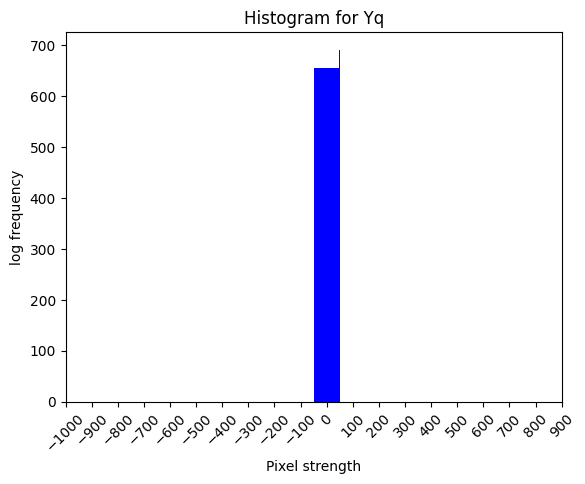

In [25]:
# Flatten the array to create a 1D array
flattened_data = Yq.flatten()

# Normal histogram
#plt.hist(flattened_data, bins=100, range=[-1000, 1000], color='blue', alpha=0.7)
#plt.xticks(np.arange(-1000,1010,110))
#plt.xticks(rotation=45)
#plt.xlabel('Pixel strength')
#plt.ylabel('frequency')
#plt.title('Histogram for Yq')
#plt.show()

# Calculate the frequencies of each unique number
unique_numbers, counts = np.unique(flattened_data, return_counts=True)
plt.bar(unique_numbers, np.array(counts), width=1, color='blue') 
plt.xticks(np.arange(-1000,1000,100))
plt.xticks(rotation=45)
plt.xlabel('Pixel strength')
plt.ylabel('log frequency')
plt.title('Histogram for Yq')
plt.show()

# So I can hide this:

In [26]:
from typing import Tuple, NamedTuple, Optional

import numpy as np
from cued_sf2_lab.laplacian_pyramid import quant1, quant2
from cued_sf2_lab.dct import dct_ii, colxfm, regroup
from cued_sf2_lab.bitword import bitword


class HuffmanTable(NamedTuple):
    """A huffman table stored in sorted order
    
    Attributes:
        bits: The number of values per bit level, shape ``(16,)``.
        huffval: The codes sorted by bit length, shape ``(162,)``.
    """
    bits: np.ndarray
    huffval: np.ndarray

    @property
    def codes(self) -> np.ndarray:
        """ Produce an array of codewords corresponding to the requested bit lengths"""
        ncodes = len(self.huffval)
        if np.sum(self.bits) != ncodes:
            raise ValueError("bits and huffvals disagree")

        # Generate huffman size table (JPEG fig C1, p78):
        k = 0
        huffsize = np.zeros(ncodes, dtype=int)
        for i, b in enumerate(self.bits):
            huffsize[k:k+b] = i + 1
            k += b

        huffcode = np.zeros(ncodes, dtype=int)
        code = 0
        si = huffsize[0]

        # Generate huffman code table (JPEG fig C2, p79)
        for k in range(ncodes):
            while huffsize[k] > si:
                code = code * 2
                si += 1
            huffcode[k] = code
            code += 1

        huff_bitwords = np.zeros(ncodes, dtype=bitword.dtype)
        huff_bitwords['val'] = huffcode
        huff_bitwords['bits'] = huffsize
        return huff_bitwords

def HuffmanTable__new__(cls, bits, huffval):
    assert len(huffval) == sum(bits)
    return super(cls, HuffmanTable).__new__(cls, (bits, huffval))

HuffmanTable.__new__ = HuffmanTable__new__

In [27]:
def lbtenc_hist(X: np.ndarray, qstep: float, N: int = 8, M: int = 8,
        opthuff: bool = False, dcbits: int = 8, log: bool = True, s: float = 1.0,
        n_bins = 100
        ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Encodes the image in X to generate a variable length bit stream.

    Parameters:
        X: the input greyscale image
        qstep: the quantisation step to use in encoding
        N: the width of the DCT block (defaults to 8)
        M: the width of each block to be coded (defaults to N). Must be an
            integer multiple of N - if it is larger, individual blocks are
            regrouped.
        opthuff: if true, the Huffman table is optimised based on the data in X
        dcbits: the number of bits to use to encode the DC coefficients
            of the DCT.

    Returns:
        vlc: variable length output codes, where ``vlc[:,0]`` are the codes and
            ``vlc[:,1]`` the number of corresponding valid bits, so that
            ``sum(vlc[:,1])`` gives the total number of bits in the image
        hufftab: optional outputs containing the Huffman encoding
            used in compression when `opthuff` is ``True``.
    '''

    if M % N != 0:
        raise ValueError('M must be an integer multiple of N!')

    # DCT on input image X.
    if log:
        print('Forward {} x {} DCT'.format(N, N))
    C8 = dct_ii(N)
    #Y = colxfm(colxfm(X, C8).T, C8).T ################################################################################################
    Y = lbt(X, N, s)

    # Quantise to integers.
    if log:
        print('Quantising to step size of {}'.format(qstep))
    #Yq = quant1(Y, qstep, qstep).astype('int') ################################################################################

    n_bins = 100

    def quantize_array(Y, n_bins=100):
        Y_flattened = Y.flatten()
        Y_sorted = np.sort(Y_flattened)
        
        num_values = len(Y_sorted)
        values_per_bin = num_values // n_bins
        real_n_bins = n_bins #+ (num_values%n_bins != 0)
        
        bin_boundaries = [Y_sorted[i*values_per_bin] for i in range(real_n_bins)]
        bin_boundaries.append(Y_sorted[-1])
        
        Yq_mean = np.array([(bin_boundaries[i]+bin_boundaries[i+1])/2 for i in range(len(bin_boundaries)-1)])
        
        Yq = np.digitize(Y, bin_boundaries[:-1]) - 1 - n_bins//2
        
        
        return Yq, Yq_mean, bin_boundaries

    # quant5
    Yq, Yq_mean, bin_boundaries = quantize_array(Y)
    

    # Generate zig-zag scan of AC coefs.
    scan = diagscan(M)

    # On the first pass use default huffman tables.
    if log:
        print('Generating huffcode and ehuf using default tables')
    dhufftab = huffdflt(1)  # Default tables.
    huffcode, ehuf = huffgen(dhufftab)

    # Generate run/ampl values and code them into vlc(:,1:2).
    # Also generate a histogram of code symbols.
    if log:
        print('Coding rows')
    sy = Yq.shape
    huffhist = np.zeros(16 ** 2)
    vlc = []
    for r in range(0, sy[0], M):
        for c in range(0, sy[1], M):
            yq = Yq[r:r+M,c:c+M]
            # Possibly regroup
            if M > N:
                yq = regroup(yq, N)
            yqflat = yq.flatten('F')
            # Encode DC coefficient first
            dccoef = yqflat[0] + 2 ** (dcbits-1)
            if dccoef not in range(2**dcbits):
                raise ValueError(
                    'DC coefficients too large for desired number of bits')
            vlc.append(np.array([[dccoef, dcbits]]))
            # Encode the other AC coefficients in scan order
            # huffenc() also updates huffhist.
            ra1 = runampl(yqflat[scan])
            vlc.append(huffenc(huffhist, ra1, ehuf))
    # (0, 2) array makes this work even if `vlc == []`
    vlc = np.concatenate([np.zeros((0, 2), dtype=np.intp)] + vlc)

    # Return here if the default tables are sufficient, otherwise repeat the
    # encoding process using the custom designed huffman tables.
    if not opthuff:
        if log:
            print('Bits for coded image = {}'.format(sum(vlc[:, 1])))
        return vlc, dhufftab, Yq_mean

    # Design custom huffman tables.
    if log:
        print('Generating huffcode and ehuf using custom tables')
    dhufftab = huffdes(huffhist)
    huffcode, ehuf = huffgen(dhufftab)

    # Generate run/ampl values and code them into vlc(:,1:2).
    # Also generate a histogram of code symbols.
    if log:
        print('Coding rows (second pass)')
    huffhist = np.zeros(16 ** 2)
    vlc = []
    for r in range(0, sy[0], M):
        for c in range(0, sy[1], M):
            yq = Yq[r:r+M, c:c+M]
            # Possibly regroup
            if M > N:
                yq = regroup(yq, N)
            yqflat = yq.flatten('F')
            # Encode DC coefficient first
            dccoef = yqflat[0] + 2 ** (dcbits-1)
            vlc.append(np.array([[dccoef, dcbits]]))
            # Encode the other AC coefficients in scan order
            # huffenc() also updates huffhist.
            ra1 = runampl(yqflat[scan])
            vlc.append(huffenc(huffhist, ra1, ehuf))
    # (0, 2) array makes this work even if `vlc == []`
    vlc = np.concatenate([np.zeros((0, 2), dtype=np.intp)] + vlc)

    if log:
        print('Bits for coded image = {}'.format(sum(vlc[:, 1])))
        print('Bits for huffman table = {}'.format(
            (16 + max(dhufftab.huffval.shape))*8))

    return vlc, dhufftab, Yq_mean


def lbtdec_hist(vlc: np.ndarray, qstep: float, Yq_mean, N: int = 8, M: int = 8,
        hufftab: Optional[HuffmanTable] = None,
        dcbits: int = 8, W: int = 256, H: int = 256, log: bool = True, s: float = 1,
        n_bins = 100
        ) -> np.ndarray:
    '''
    Decodes a (simplified) JPEG bit stream to an image

    Parameters:

        vlc: variable length output code from jpegenc
        qstep: quantisation step to use in decoding
        N: width of the DCT block (defaults to 8)
        M: width of each block to be coded (defaults to N). Must be an
            integer multiple of N - if it is larger, individual blocks are
            regrouped.
        hufftab: if supplied, these will be used in Huffman decoding
            of the data, otherwise default tables are used
        dcbits: the number of bits to use to decode the DC coefficients
            of the DCT
        W, H: the size of the image (defaults to 256 x 256)

    Returns:

        Z: the output greyscale image
    '''

    opthuff = (hufftab is not None)
    if M % N != 0:
        raise ValueError('M must be an integer multiple of N!')

    # Set up standard scan sequence
    scan = diagscan(M)

    if opthuff:
        if len(hufftab.bits.shape) != 1:
            raise ValueError('bits.shape must be (len(bits),)')
        if log:
            print('Generating huffcode and ehuf using custom tables')
    else:
        if log:
            print('Generating huffcode and ehuf using default tables')
        hufftab = huffdflt(1)
    # Define starting addresses of each new code length in huffcode.
    # 0-based indexing instead of 1
    huffstart = np.cumsum(np.block([0, hufftab.bits[:15]]))
    # Set up huffman coding arrays.
    huffcode, ehuf = huffgen(hufftab)

    # Define array of powers of 2 from 1 to 2^16.
    k = 2 ** np.arange(17)

    # For each block in the image:

    # Decode the dc coef (a fixed-length word)
    # Look for any 15/0 code words.
    # Choose alternate code words to be decoded (excluding 15/0 ones).
    # and mark these with vector t until the next 0/0 EOB code is found.
    # Decode all the t huffman codes, and the t+1 amplitude codes.

    eob = ehuf[0]
    run16 = ehuf[15 * 16]
    i = 0
    Zq = np.zeros((H, W))

    if log:
        print('Decoding rows')
    for r in range(0, H, M):
        for c in range(0, W, M):
            yq = np.zeros(M**2)

            # Decode DC coef - assume no of bits is correctly given in vlc table.
            cf = 0
            if vlc[i, 1] != dcbits:
                raise ValueError(
                    'The bits for the DC coefficient does not agree with vlc table')
            yq[cf] = vlc[i, 0] - 2 ** (dcbits-1)
            i += 1

            # Loop for each non-zero AC coef.
            while np.any(vlc[i] != eob):
                run = 0

                # Decode any runs of 16 zeros first.
                while np.all(vlc[i] == run16):
                    run += 16
                    i += 1

                # Decode run and size (in bits) of AC coef.
                start = huffstart[vlc[i, 1] - 1]
                res = hufftab.huffval[start + vlc[i, 0] - huffcode[start]]
                run += res // 16
                cf += run + 1
                si = res % 16
                i += 1

                # Decode amplitude of AC coef.
                if vlc[i, 1] != si:
                    raise ValueError(
                        'Problem with decoding .. you might be using the wrong hufftab table')
                ampl = vlc[i, 0]

                # Adjust ampl for negative coef (i.e. MSB = 0).
                thr = k[si - 1]
                yq[scan[cf-1]] = ampl - (ampl < thr) * (2 * thr - 1)

                i += 1

            # End-of-block detected, save block.
            i += 1

            yq = yq.reshape((M, M)).T

            # Possibly regroup yq
            if M > N:
                yq = regroup(yq, M//N)
            Zq[r:r+M, c:c+M] = yq

    if log:
        print('Inverse quantising to step size of {}'.format(qstep))

    #Zi = quant2(Zq, qstep, qstep) #@#####################################################################################

    if log:
        print(Zq[::32,::32].astype(int) + n_bins // 2)

    # quant6
    Zi = Zq.copy().astype(int) + n_bins//2
    for i in range(Yq.shape[0]):
        for j in range(Yq.shape[1]):
            #print(Yq[i,j])
            index = int(Zq[i, j])
            Zi[i, j] = Yq_mean[index]
    
    if log:
        print(Zi[::32,::32].astype(int))

    if log:
        print('Inverse {} x {} DCT\n'.format(N, N))
    C8 = dct_ii(N)
    #Z = colxfm(colxfm(Zi.T, C8.T).T, C8.T) ###################################################################################################
    Zq = ilbt(Zi, N, s)
    z_max = np.max(Zq)
    z_min = np.min(Zq)
    Zq = Zq * 256/np.abs(z_max - z_min)
    Zq = Zq - np.min(Zq)
    return Zq

In [28]:
# your code here
from cued_sf2_lab.jpeg import *

#X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
#X = X - 128.0
X, _ = load_mat_img(img='lighthouse.mat', img_info='X')
X = X - 128.0

qstep = 40
vlc, hufftab, Yq_mean = lbtenc_hist(X, qstep, opthuff=True, n_bins = 100)


print(vlc[:,1].sum())

#print(dict(zip(hufftab.huffval, hufftab.codes)))|
print(hufftab.huffval)

Forward 8 x 8 DCT
Quantising to step size of 40
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 466782
Bits for huffman table = 1424
466782
[  6   5   4   3   2   1   0  21  19  20  18  22  17  33  35  36   7   8
   9  10  23  24  25  26  34  37  38  39  40  41  42  49  50  51  52  53
  54  55  56  57  58  65  66  67  68  69  70  71  72  73  74  81  82  83
  84  85  86  87  88  89  90  97  98  99 100 101 102 103 104 105 106 113
 114 115 116 117 118 119 120 121 122 129 130 131 132 133 134 135 136 137
 138 145 146 147 148 149 150 151 152 153 154 161 162 163 164 165 166 167
 168 169 170 177 178 179 180 181 182 183 184 185 186 193 194 195 196 197
 198 199 200 201 202 209 210 211 212 213 214 215 216 217 218 225 226 227
 228 229 230 231 232 233 234 240 241 242 243 244 245 246 247 248 249 250]


Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 40
[[ 1  2  1  1  3  1 78 99]
 [ 0  0  1  2 95  0 99 99]
 [97 96  0  2  0 99 99 99]
 [98  1  4 98  0  0 99 99]
 [99  0  0  0  0 99 98 98]
 [99 99 99  1 99 99  0  0]
 [ 0 99 99 99 99 99 99 97]
 [99 99 27 99 99  0  0  0]]
[[ 0  0  0  0  0  0 -2  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0]]
Inverse 8 x 8 DCT

53.90097860748801
0.0 256.0


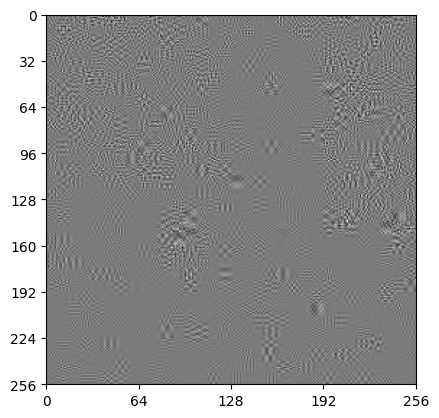

In [29]:
Z = lbtdec_hist(vlc, qstep, Yq_mean, hufftab = hufftab, n_bins = 100) # We don't need hufftab? what is this sorcery

fig, ax = plt.subplots()
plot_image(Z)

print(np.std(X-Z))
print(np.min(Z), np.max(Z)) # min max of Z

# NEED TO FIX N=4 vs N=16 problem in the encoder/decoder!!!!!!!!!!!


In [30]:

def lbtenc2(X: np.ndarray, qstep: float, N: int = 8, M: int = 8,
        opthuff: bool = False, dcbits: int = 8, log: bool = True, s: float = 1.0
        ) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Encodes the image in X to generate a variable length bit stream.

    Parameters:
        X: the input greyscale image
        qstep: the quantisation step to use in encoding
        N: the width of the DCT block (defaults to 8)
        M: the width of each block to be coded (defaults to N). Must be an
            integer multiple of N - if it is larger, individual blocks are
            regrouped.
        opthuff: if true, the Huffman table is optimised based on the data in X
        dcbits: the number of bits to use to encode the DC coefficients
            of the DCT.

    Returns:
        vlc: variable length output codes, where ``vlc[:,0]`` are the codes and
            ``vlc[:,1]`` the number of corresponding valid bits, so that
            ``sum(vlc[:,1])`` gives the total number of bits in the image
        hufftab: optional outputs containing the Huffman encoding
            used in compression when `opthuff` is ``True``.
    '''

    if M % N != 0:
        raise ValueError('M must be an integer multiple of N!')

    # DCT on input image X.
    if log:
        print('Forward {} x {} DCT'.format(N, N))
    C8 = dct_ii(N)
    #Y = colxfm(colxfm(X, C8).T, C8).T ################################################################################################
    Y = lbt(X, N, s)

    # Quantise to integers.
    if log:
        print('Quantising to step size of {}'.format(qstep))
    Yq = quant1(Y, qstep, qstep).astype('int')

    if log:
        print(Yq[::32,::32])

    # Generate zig-zag scan of AC coefs.
    scan = diagscan(M)

    # On the first pass use default huffman tables.
    if log:
        print('Generating huffcode and ehuf using default tables')
    dhufftab = huffdflt(1)  # Default tables.
    huffcode, ehuf = huffgen(dhufftab)

    # Generate run/ampl values and code them into vlc(:,1:2).
    # Also generate a histogram of code symbols.
    if log:
        print('Coding rows')
    sy = Yq.shape
    huffhist = np.zeros(16 ** 2)
    vlc = []
    for r in range(0, sy[0], M):
        for c in range(0, sy[1], M):
            yq = Yq[r:r+M,c:c+M]
            # Possibly regroup
            if M > N:
                yq = regroup(yq, N)
            yqflat = yq.flatten('F')
            # Encode DC coefficient first
            dccoef = yqflat[0] + 2 ** (dcbits-1)
            if dccoef not in range(2**dcbits):
                raise ValueError(
                    'DC coefficients too large for desired number of bits')
            vlc.append(np.array([[dccoef, dcbits]]))
            # Encode the other AC coefficients in scan order
            # huffenc() also updates huffhist.
            ra1 = runampl(yqflat[scan])
            vlc.append(huffenc(huffhist, ra1, ehuf))
    # (0, 2) array makes this work even if `vlc == []`
    vlc = np.concatenate([np.zeros((0, 2), dtype=np.intp)] + vlc)

    # Return here if the default tables are sufficient, otherwise repeat the
    # encoding process using the custom designed huffman tables.
    if not opthuff:
        if log:
            print('Bits for coded image = {}'.format(sum(vlc[:, 1])))
        return vlc, dhufftab

    # Design custom huffman tables.
    if log:
        print('Generating huffcode and ehuf using custom tables')
    dhufftab = huffdes(huffhist)
    huffcode, ehuf = huffgen(dhufftab)

    # Generate run/ampl values and code them into vlc(:,1:2).
    # Also generate a histogram of code symbols.
    if log:
        print('Coding rows (second pass)')
    huffhist = np.zeros(16 ** 2)
    vlc = []
    for r in range(0, sy[0], M):
        for c in range(0, sy[1], M):
            yq = Yq[r:r+M, c:c+M]
            # Possibly regroup
            if M > N:
                yq = regroup(yq, N)
            yqflat = yq.flatten('F')
            # Encode DC coefficient first
            dccoef = yqflat[0] + 2 ** (dcbits-1)
            vlc.append(np.array([[dccoef, dcbits]]))
            # Encode the other AC coefficients in scan order
            # huffenc() also updates huffhist.
            ra1 = runampl(yqflat[scan])
            vlc.append(huffenc(huffhist, ra1, ehuf))
    # (0, 2) array makes this work even if `vlc == []`
    vlc = np.concatenate([np.zeros((0, 2), dtype=np.intp)] + vlc)

    if log:
        print('Bits for coded image = {}'.format(sum(vlc[:, 1])))
        print('Bits for huffman table = {}'.format(
            (16 + max(dhufftab.huffval.shape))*8))

    return vlc, dhufftab


def lbtdec2(vlc: np.ndarray, qstep: float, N: int = 8, M: int = 8,
        hufftab: Optional[HuffmanTable] = None,
        dcbits: int = 8, W: int = 256, H: int = 256, log: bool = True, s: float = 1
        ) -> np.ndarray:
    '''
    Decodes a (simplified) JPEG bit stream to an image

    Parameters:

        vlc: variable length output code from jpegenc
        qstep: quantisation step to use in decoding
        N: width of the DCT block (defaults to 8)
        M: width of each block to be coded (defaults to N). Must be an
            integer multiple of N - if it is larger, individual blocks are
            regrouped.
        hufftab: if supplied, these will be used in Huffman decoding
            of the data, otherwise default tables are used
        dcbits: the number of bits to use to decode the DC coefficients
            of the DCT
        W, H: the size of the image (defaults to 256 x 256)

    Returns:

        Z: the output greyscale image
    '''

    opthuff = (hufftab is not None)
    if M % N != 0:
        raise ValueError('M must be an integer multiple of N!')

    # Set up standard scan sequence
    scan = diagscan(M)

    if opthuff:
        if len(hufftab.bits.shape) != 1:
            raise ValueError('bits.shape must be (len(bits),)')
        if log:
            print('Generating huffcode and ehuf using custom tables')
    else:
        if log:
            print('Generating huffcode and ehuf using default tables')
        hufftab = huffdflt(1)
    # Define starting addresses of each new code length in huffcode.
    # 0-based indexing instead of 1
    huffstart = np.cumsum(np.block([0, hufftab.bits[:15]]))
    # Set up huffman coding arrays.
    huffcode, ehuf = huffgen(hufftab)

    # Define array of powers of 2 from 1 to 2^16.
    k = 2 ** np.arange(17)

    # For each block in the image:

    # Decode the dc coef (a fixed-length word)
    # Look for any 15/0 code words.
    # Choose alternate code words to be decoded (excluding 15/0 ones).
    # and mark these with vector t until the next 0/0 EOB code is found.
    # Decode all the t huffman codes, and the t+1 amplitude codes.

    eob = ehuf[0]
    run16 = ehuf[15 * 16]
    i = 0
    Zq = np.zeros((H, W))

    if log:
        print('Decoding rows')
    for r in range(0, H, M):
        for c in range(0, W, M):
            yq = np.zeros(M**2)

            # Decode DC coef - assume no of bits is correctly given in vlc table.
            cf = 0
            if vlc[i, 1] != dcbits:
                raise ValueError(
                    'The bits for the DC coefficient does not agree with vlc table')
            yq[cf] = vlc[i, 0] - 2 ** (dcbits-1)
            i += 1

            # Loop for each non-zero AC coef.
            while np.any(vlc[i] != eob):
                run = 0

                # Decode any runs of 16 zeros first.
                while np.all(vlc[i] == run16):
                    run += 16
                    i += 1

                # Decode run and size (in bits) of AC coef.
                start = huffstart[vlc[i, 1] - 1]
                res = hufftab.huffval[start + vlc[i, 0] - huffcode[start]]
                run += res // 16
                cf += run + 1
                si = res % 16
                i += 1

                # Decode amplitude of AC coef.
                if vlc[i, 1] != si:
                    raise ValueError(
                        'Problem with decoding .. you might be using the wrong hufftab table')
                ampl = vlc[i, 0]

                # Adjust ampl for negative coef (i.e. MSB = 0).
                thr = k[si - 1]
                yq[scan[cf-1]] = ampl - (ampl < thr) * (2 * thr - 1)

                i += 1

            # End-of-block detected, save block.
            i += 1

            yq = yq.reshape((M, M)).T

            # Possibly regroup yq
            if M > N:
                yq = regroup(yq, M//N)
            Zq[r:r+M, c:c+M] = yq

    if log:
        print('Inverse quantising to step size of {}'.format(qstep))

    Zi = quant2(Zq, qstep, qstep)

    if log:
        print('Inverse {} x {} DCT\n'.format(N, N))
    C8 = dct_ii(N)
    #Z = colxfm(colxfm(Zi.T, C8.T).T, C8.T) ###################################################################################################
    Zq = ilbt(Zi, N, s)
    z_max = np.max(Zq)
    z_min = np.min(Zq)
    Zq = Zq * 256/np.abs(z_max - z_min)
    Zq = Zq - np.min(Zq)
    return Zq

In [31]:
# your code here
from cued_sf2_lab.jpeg import *

#X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})
#X = X - 128.0
X, _ = load_mat_img(img='lighthouse.mat', img_info='X')
X = X - 128.0

qstep = 40
vlc, hufftab = lbtenc2(X, qstep, opthuff=True)


print(vlc[:,1].sum())

#print(dict(zip(hufftab.huffval, hufftab.codes)))|
#print(hufftab.huffval)

Forward 8 x 8 DCT
Quantising to step size of 40
[[ -1  -1  -1  -2   0  -2   0   4]
 [ -6  -6  -2  -1   0 -14   6   5]
 [  1   0  -4  -1  -5  15   5   6]
 [  2  -2   0   2  -3  -3   3   3]
 [  6  -8  -5  -3  -6  14   1   2]
 [ 17   9  14  -1  19  16  -7 -12]
 [ -4   7   8  10  10   8   7   1]
 [  6   8   0   5   3  -4  -4 -13]]
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 29765
Bits for huffman table = 1424
29765


Generating huffcode and ehuf using custom tables
Decoding rows
Inverse quantising to step size of 40
Inverse 8 x 8 DCT

11.99974905392961
0.0 256.0


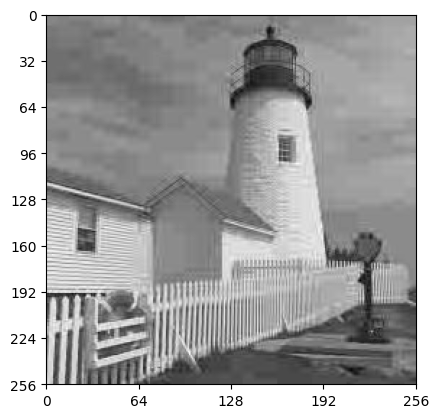

In [32]:
Z = lbtdec2(vlc, qstep, hufftab = hufftab) # We don't need hufftab? what is this sorcery

fig, ax = plt.subplots()
plot_image(Z)

print(np.std(X-Z))
print(np.min(Z), np.max(Z)) # min max of Z

# NEED TO FIX N=4 vs N=16 problem in the encoder/decoder!!!!!!!!!!!
